In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("insurance.csv")

In [6]:
df = pd.DataFrame(df)

In [7]:
df["age"] = df["age"].astype(float)
df["bmi"] = df["bmi"].astype(float)
df["children"] = df["children"].astype(float)
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0}).replace("",np.nan).astype(float)
df["charges"] = df["charges"].astype(float)
df = df.dropna()

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,1.0,southwest,16884.92400
1,18.0,male,33.770,1.0,0.0,southeast,1725.55230
2,28.0,male,33.000,3.0,0.0,southeast,4449.46200
3,33.0,male,22.705,0.0,0.0,northwest,21984.47061
4,32.0,male,28.880,0.0,0.0,northwest,3866.85520


In [9]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [10]:
X = df[["age","bmi","smoker"]].values
y = df["charges"].values

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (weights):", coefficients)
print("Intercept (Bias):", intercept)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

Coefficients (weights): [  259.54749155   322.61513282 23823.68449531]
Intercept (Bias): -11676.830425187778
Mean Squared Error: 37005395.750507504


In [11]:
X[1]

array([18.  , 33.77,  0.  ])

In [12]:
def mgd(weight, bias, X, y, le_rate=0.000001):
    pred =  X @ weight + bias
    loss = pred - y
    m = len(X)

    gradient_weight = (2/m) * np.sum(loss @ X)
    gradient_bias = (2/m) * np.sum(loss)

    weight -= le_rate * gradient_weight
    bias -= le_rate * gradient_bias
    return weight, bias


def calculate_loss(weight,bias,X,y):
    predictions = X @ weight + bias
    return np.mean((predictions -y)**2)

In [13]:
np.random.seed(42)
weight = np.random.rand(X.shape[1])
bias = np.random.rand()

loss_history =[]
iterations = 1000
le_rate = 0.000001

for _ in range(iterations):
    weight,bias = mgd(weight, bias, X, y, le_rate)
    loss = calculate_loss(weight, bias, X, y)
    loss_history.append(loss)

In [14]:
print(f"weight is {weight}")
print(f"\nBias is {bias}")
print(f"\nThe loss history is {loss_history}" )

weight is [193.23059611 193.8067703  193.58804993]

Bias is 2.6337298777573843

The loss history is [np.float64(317445785.4179461), np.float64(313578656.0573393), np.float64(309791001.38970053), np.float64(306081188.1033954), np.float64(302447616.4535365), np.float64(298888719.57214135), np.float64(295402962.79246813), np.float64(291988842.98723674), np.float64(288644887.92045057), np.float64(285369655.61253935), np.float64(282161733.7185487), np.float64(279019738.9191093), np.float64(275942316.3239216), np.float64(272928138.887501), np.float64(269975906.8369289), np.float64(267084347.1113653), np.float64(264252212.81307933), np.float64(261478282.66976252), np.float64(258761360.507892), np.float64(256100274.73691648), np.float64(253493877.84404337), np.float64(250941045.89940858), np.float64(248440678.0714155), np.float64(245991696.15203473), np.float64(243593044.09185937), np.float64(241243687.5447154), np.float64(238942613.42163157), np.float64(236688829.45397484), np.float64(2344813

In [15]:
import matplotlib.pyplot as plt

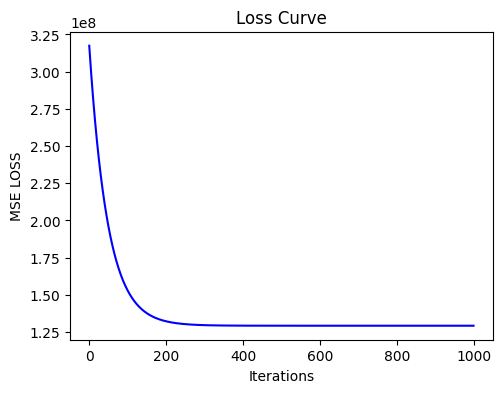

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(iterations), loss_history, color='blue')
plt.title('Loss Curve')
plt.xlabel("Iterations")
plt.ylabel("MSE LOSS")
plt.show()

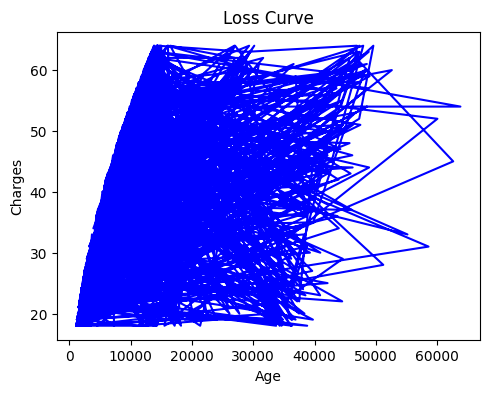

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(df["charges"],df["age"], color='blue')
plt.title('Loss Curve')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()